## Alunos: Samuel Lipovetsky, Alexis Mariz, Leandro diniz.
## 1. Compreensão do Negócio

Nesta seção, vamos fornecer uma explicação detalhada do problema de negócio sendo resolvido com os dados fornecidos. O foco é entender o propósito do dataset, sua origem e o valor que ele pode agregar na solução de problemas.

### Objetivo do Dataset
O propósito deste dataset é verificar se existem grupos de bairros com perfis de acidentes similares. Ou seja, existem bairros em  Belo Horizonte com perfis de acidentes similares, e se sim, quais são as caracteristicas que diferenciam os bairros. 

### Origem dos Dados
O dataset tem origem nos registros públicos disponibilizados pela prefeitura de Belo Horizonte, que incluem dados detalhados sobre acidentes de trânsito ao longo de vários anos. O conjunto de dados abrange diversos detalhes sobre cada acidente, como horário, local, pessoas envolvidas e tipos de veículos.

### Características do Dataset
O dataset é composto por quatro seções principais, com as seguintes informações:

- **Acidentes**: Contém dados como o tipo de acidente, horário, condições climáticas e tipo de socorro prestado.
- **Veículos**: Inclui detalhes sobre o tipo e a situação do veículo (em movimento, estacionado, etc.) e se o veículo era de uso particular ou não.
- **Pessoas Envolvidas**: Registra informações como idade, gênero, gravidade dos ferimentos e o papel no acidente (condutor, passageiro, pedestre).
- **Localização**: Descreve a rua e o bairro onde os acidentes ocorreram.

Cada linha representa uma pessoa envolvida em um acidente e inclui todas as informações associadas ao acidente e ao indivíduo.

### Relação com o Problema de Negócio
Como este dataset possui as informações sobre os acidentes que aconteceram em Belo Horizonte, é possivel agrupar as linhas das tabelas por bairro, e gerar assim uma nova tabela em que cada linha é um bairro e em seguida rodar os algoritmos de agrupamento.

## Link para a conversa com a LLM
Nesta  seção nenhuma LLM foi utilizada.

## 2. Compreensão e Preparação dos Dados

### Compreensão dos Dados

Nesta fase, exploramos o dataset em detalhes, focando em entender sua estrutura e características. A maior parte dos dados é categórica, com exceção de variáveis como a idade da pessoa envolvida e a hora do acidente. Observou-se uma quantidade significativa de valores ausentes em atributos importantes, como “embriaguez” e “uso do cinto de segurança”. Esses campos foram desconsiderados para análise posterior.

A análise inicial incluiu uma investigação sobre a distribuição dos valores e estatísticas descritivas, além da identificação de valores nulos e duplicados.

### Preparação dos Dados

1. **Limpeza de Dados**: Removemos dados nulos e registros duplicados, além de excluirmos colunas irrelevantes para o processo de mineração, listadas em `columns_to_be_dropped`. Esse passo foi essencial para reduzir a dimensionalidade do dataset e remover informações redundantes.

2. **Transformação de Dados**: 
   - **Binning**: A idade foi categorizada em faixas (criança, jovem adulto, adulto e idoso), e a hora do acidente foi agrupada em períodos (manhã, tarde e noite), facilitando a análise e simplificando os dados numéricos.
   - **One Hot Encoding**: Para viabilizar o uso dos dados categóricos nas tarefas de

### Link para a conversa com a LLM

https://chatgpt.com/share/674f875e-684c-800c-8cca-7719862b58d8

A llm foi muito util em gerar muitas visualizações, porém muitas delas eram um pouco sem sentido. A maior dificulade é comunicar quals colunas existem na tabela e o significaod dessas colunas.

In [1]:
import pandas as pd
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)



print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()



si-bol DataFrame shape: (44371, 23)
si-env DataFrame shape: (99485, 16)
si-veic DataFrame shape: (78867, 11)
si-log DataFrame shape: (59955, 16)


,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,local_sinalizado,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,data_hora_boletim_x,numero_envolvido,condutor,codigo_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro,data_boletim,numero_municipio,nome_municipio,sequencia_logradouros,numero_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradoro_anterior,Numero_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,numero_imovel,numero_imovel_proximo
0,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,55,19/10/1957,N,NAO INFORMADO ...,0,0,AUTOMOVEL,01/01/2013 01:16,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
1,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,55,19/10/1957,N,NAO INFORMADO ...,0,0,AUTOMOVEL,01/01/2013 01:16,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
2,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,18,14/06/1994,N,NAO INFORMADO ...,0,0,MOTOCICLETA,01/01/2013 01:16,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
3,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,18,14/06/1994,N,NAO INFORMADO ...,0,0,MOTOCICLETA,01/01/2013 01:16,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
4,665,01/01/2013 02:12,20/08/2013 00:00,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,21,NORDESTE,PMMG,NÃO INFORMADO,0,61218262.0,80178625.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 02:12,1,SIM,3,SEM FERIMENTOS,F,NÃO INFORMADO,NÃO INFORMADO,27,11/03/1985,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,01/01/2013 02:12,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,01/01/2013 02:12,1.0,BELO HORIZONTE,1.0,18652.0,AVE,CRISTIANO MACHADO ...,NI,NÃO INFORMADO ...,698.0,IPIRANGA ...,B,BAIRRO,3435,0.0


In [2]:


columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,318,01/01/2013 01:16,H01002,SIM,SEM FERIMENTOS,M,55,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
1,318,01/01/2013 01:16,H01002,SIM,SEM FERIMENTOS,M,55,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
2,318,01/01/2013 01:16,H01002,SIM,NAO FATAL,M,18,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
3,318,01/01/2013 01:16,H01002,SIM,NAO FATAL,M,18,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
4,665,01/01/2013 02:12,H06002,SIM,SEM FERIMENTOS,F,27,B,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,AVE,IPIRANGA ...


## Binning and prepping the data
Nas celulas abaixo é feito o binning de todas as colunas de forma que a nova tabela é composta somete por atributos boleanos.

In [3]:

#binning hour of day and age
clustering_df = joined_df

clustering_df['data hora_boletim'] = pd.to_datetime(clustering_df['data hora_boletim'], format='%d/%m/%Y %H:%M')
clustering_df['hour'] = clustering_df['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


clustering_df['morning'] = clustering_df['hour'].apply(lambda x: True if x in morning_hours else False)
clustering_df['afternoon'] = clustering_df['hour'].apply(lambda x: True if x in afternoon_hours else False)
clustering_df['night'] = clustering_df['hour'].apply(lambda x: True if x in night_hours else False)

clustering_df.drop(columns=['hour','data hora_boletim'], inplace=True)

#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

clustering_df['Idade'] =clustering_df['Idade'].astype('int')
clustering_df['children'] = clustering_df['Idade'].apply(lambda x: True if x in children else False)
clustering_df['young_adult'] = clustering_df['Idade'].apply(lambda x: True if x in young_adult else False)
clustering_df['middle_aged'] = clustering_df['Idade'].apply(lambda x: True if x in middle_aged else False)
clustering_df['old_aged'] = clustering_df['Idade'].apply(lambda x: True if x in old_aged else False)

clustering_df.drop(columns=['Idade'], inplace=True)


#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    clustering_df['descricao_especie'] = clustering_df['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(clustering_df['descricao_especie'])
true_counts = vehicles_one_hot.sum()

clustering_df.drop(columns=['descricao_especie'],inplace=True)

#prepping "descricao_tipo_socorro"
clustering_df['descricao_tipo_socorro'] = clustering_df['descricao_tipo_socorro'].apply(lambda x: "socorro:"+ str(x))
descricao_tipo_socorro_one_hot = pd.get_dummies(clustering_df['descricao_tipo_socorro'])
true_counts = descricao_tipo_socorro_one_hot.sum()
descricao_tipo_socorro_one_hot.head()
clustering_df.drop(columns=['descricao_tipo_socorro'],inplace=True)

#prepping "descricao_severidade"
clustering_df['desc_severidade'] = clustering_df['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x))
desc_severidade_one_hot = pd.get_dummies(clustering_df['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
clustering_df.drop(columns=['desc_severidade'],inplace=True)

#prepping "descricao_situação"
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
clustering_df['descricao_situacao'] = clustering_df['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(clustering_df['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
clustering_df.drop(columns=['descricao_situacao'],inplace=True)

#prepping "condutor"
clustering_df['condutor'] = clustering_df['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(clustering_df['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
clustering_df.drop(columns=['condutor'],inplace=True)

#prepping "tipo_logradouo"
to_be_replace =["TRV","TUN","VDP","VDT","VIA"
                ,"BEC","ELP","EST","NI","ALA"]
for r in to_be_replace:
    clustering_df['tipo_logradouro'] = clustering_df['tipo_logradouro'].str.strip().replace(r,"OUTROS_LOCAIS")
logradouro_one_hot = pd.get_dummies(clustering_df['tipo_logradouro'])
true_counts = logradouro_one_hot.sum()
logradouro_one_hot.head()

#prepping "sexo"
clustering_df['sexo'] = clustering_df['sexo'].str.strip().replace("0","sexo nao informado")
sexo_one_hot = pd.get_dummies(clustering_df['sexo'])
true_counts = sexo_one_hot.sum()
sexo_one_hot.head()

clustering_df.drop(columns="sexo",inplace=True)

#encoding "tipo de acidente"
tipo_acidente_one_hot = pd.get_dummies(clustering_df['tipo_acidente'])
true_counts = tipo_acidente_one_hot.sum()
tipo_acidente_one_hot.head()


clustering_df.drop(columns="tipo_acidente",inplace=True)



## Juntando os dataframes one hot encoded
Na celula abaixo todos os dataframes que ainda estavam sepados são aglomerados. Ainda , são removidas as colunas com pouca informação e as linhas são agrupadas pelos bairros, ou seja, temos agora uma tabela que conta quantas vezes uma certa caracteristica de um acidente ocorereu em cada bairro.

In [4]:
# Joining all one hot encoded dfs
clustering_df.drop(columns=["numero_boletim","categoria_habilitacao","tipo_logradouro"],inplace=True)
concat_dfs= pd.concat([clustering_df.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       
                       descricao_tipo_socorro_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True),
                        logradouro_one_hot.reset_index(drop=True),
                         sexo_one_hot.reset_index(drop=True),
                         tipo_acidente_one_hot.reset_index(drop=True),
                         desc_severidade_one_hot.reset_index(drop=True  )],axis=1)
concat_dfs["nome_bairro"]=concat_dfs["nome_bairro"].str.rstrip()
# concat_dfs = concat_dfs[concat_dfs['nome_bairro'] != "NÃO INFORMADO"]
display(concat_dfs.head())


grouped = concat_dfs.groupby('nome_bairro').sum()
grouped_sorted = grouped.sort_values(by='night', ascending=False)
grouped_sorted.reset_index(inplace=True)
grouped_sorted = grouped_sorted.drop(index=0)
grouped_sorted["nome_bairro"]=grouped_sorted["nome_bairro"].str.rstrip()


#dropping colluimns with very small numbers

to_be_dropped =["condutor:NÃO INFORMADO","socorro:nan"]

grouped_sorted.drop(columns=to_be_dropped,inplace=True)
display(grouped_sorted.head())

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:NÃO INFORMADO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,socorro:nan,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
0,ITAPOA,False,False,True,False,False,False,True,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,ITAPOA,False,False,True,False,False,False,True,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,ITAPOA,False,False,True,False,True,False,False,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,ITAPOA,False,False,True,False,True,False,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,IPIRANGA,False,False,True,False,True,False,False,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
1,CENTRO,3050,3838,2860,865,2805,3198,2526,2836,6898,8775,193,778,2678,4608,107,741,1612,3617,42,335,3036,2508,208,5168,279,301,0,4000,2475,6728,545,3441,179,31,1029,0,38,2493,5,1406,891,235,30,5182,571,3965
2,SANTA EFIGENIA,1366,1441,1094,339,1199,1200,1029,833,3065,3425,125,351,929,1995,94,285,598,1746,50,134,1254,632,85,2526,112,108,0,1155,1040,2665,196,1657,79,27,347,0,6,400,2,819,476,88,6,2051,223,1621
3,PADRE EUSTAQUIO,834,1025,845,252,822,878,655,523,2178,2432,81,191,734,1510,17,91,352,1358,36,232,798,243,37,671,3,36,274,1720,662,1901,141,1418,56,3,116,2,10,241,1,427,410,20,9,1408,151,1136
4,VENDA NOVA,758,1001,757,288,846,813,490,491,2023,2198,69,249,599,1361,46,108,402,1059,30,132,908,343,44,1263,2,0,14,1237,591,1771,154,1088,65,11,116,0,2,269,6,525,394,40,7,1294,157,1058
5,SAO FRANCISCO,709,847,733,254,795,763,409,373,1910,1991,59,239,621,1332,26,27,283,1057,12,258,764,154,44,1034,0,6,925,324,422,1703,164,815,72,12,63,4,17,176,4,569,535,22,23,1138,164,964


## Explorando visualmente os dados

#### Horário de acidentes nos top 10 bairros com mais acidentes

<Axes: xlabel='nome_bairro'>

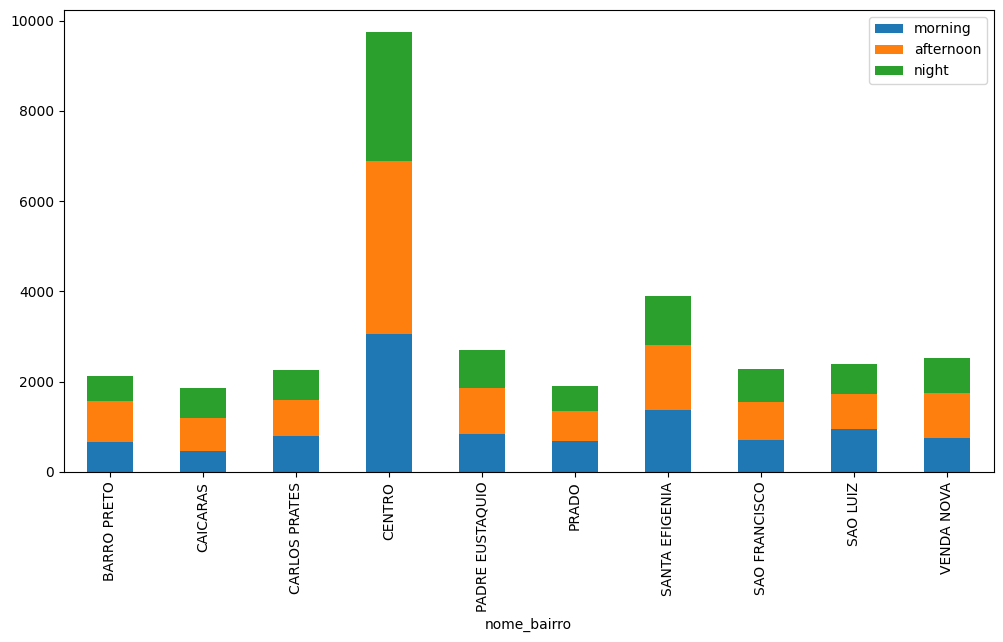

In [5]:
concat_dfs["nome_bairro"]=concat_dfs["nome_bairro"].str.rstrip()
concat_dfs = concat_dfs[concat_dfs['nome_bairro'] != "NÃO INFORMADO"]
df =concat_dfs
# print(concat_dfs[concat_dfs['nome_bairro']])
top_df = df['nome_bairro'].value_counts().head(10).index
df= df[df['nome_bairro'].isin(top_df)]
df.groupby('nome_bairro')[['morning', 'afternoon', 'night']].sum().plot(kind='bar', stacked=True, figsize=(12, 6))


### Faixa etárias

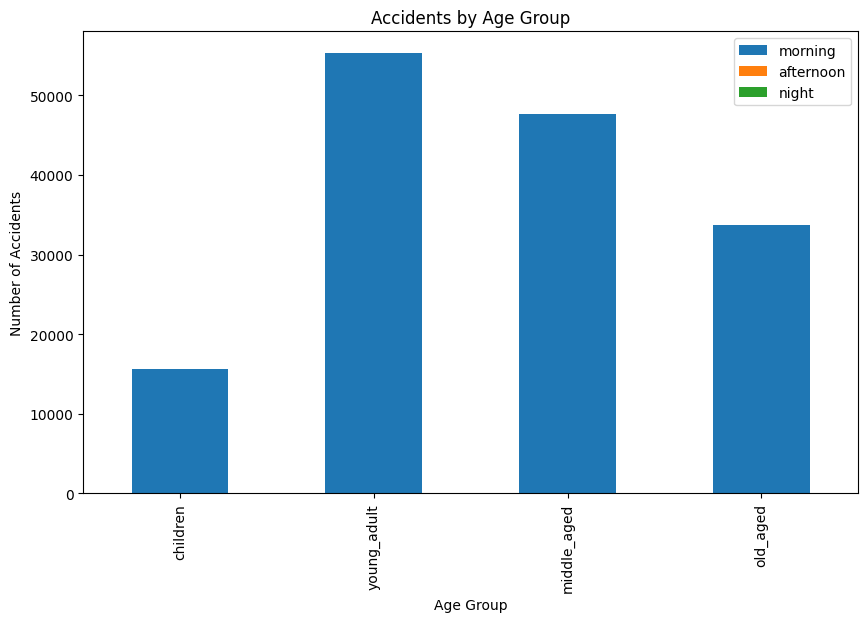

In [6]:

import matplotlib.pyplot as plt
concat_dfs["nome_bairro"]=concat_dfs["nome_bairro"].str.rstrip()
# concat_dfs = concat_dfs[concat_dfs['nome_bairro'] != "NÃO INFORMADO"]
df =concat_dfs
# print(concat_dfs[concat_dfs['nome_bairro']])
top_df = df['nome_bairro'].value_counts().index
df= df[df['nome_bairro'].isin(top_df)]
df.groupby('nome_bairro')[['morning', 'afternoon', 'night']].sum().plot(kind='bar', stacked=True, figsize=(12, 6))

# age_groups = df[['children', 'young_adult', 'middle_aged', 'old_aged']].sum()
# age_groups.plot(kind='bar', title='Accidents by Age Group')
age_groups = df[['children', 'young_adult', 'middle_aged', 'old_aged']].sum()
ax = age_groups.plot(kind='bar', title='Accidents by Age Group', figsize=(10, 6))

# Set axis labels
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Age Group')

plt.show()


### Veículos envolvidos

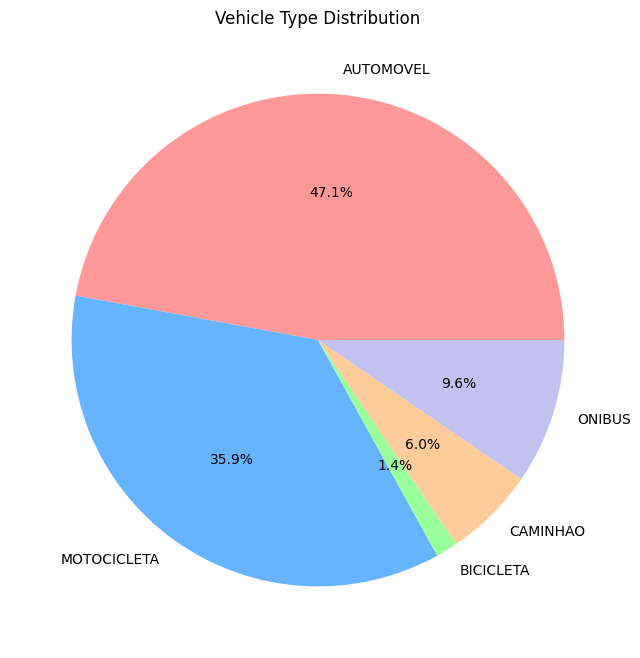

In [7]:
# Count the number of accidents by vehicle type
vehicle_types = df[['AUTOMOVEL', 'MOTOCICLETA', 'BICICLETA', 'CAMINHAO', 'ONIBUS']].sum()

# Plot pie chart
vehicle_types.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Vehicle Type Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

## 3. Modelagem  

### 1. Objetivo  
O objetivo é gerar modelos de agrupamento para o dataset tratado e comparar as métricas entre os diferentes modelos. Ainda, queremos utilizar o conhecimento gerado pelo classificador para identificar quais colunas ou grupos de colunas influenciam um bairro a pertencer a um determinado grupo.

### 2. Implementação dos Algoritmos  

Antes de rodar qualquer algoritmos de agrupamento, os dados foram nomalizados para facilitar o agrupamento.

**Agrupamento Hierárquico**: Será utilizado o agrupamento hierárquico para gerar um dendograma que demonstra visualmente quando grupos são mesclados. O dendograma auxiliará na escolha de um valor ideal de *K* para o algoritmo K-means, garantindo uma melhor definição dos grupos com base nas distâncias observadas.  

**K-means**: Após a análise do dendograma, será definido um valor adequado para *K* no K-means, que permitirá realizar a classificação baseada nos grupos identificados. Além disso, será selecionada a métrica de similaridade mais apropriada para garantir a precisão do modelo.  

### 3. Configuração dos Parâmetros  
Os parâmetros a serem ajustados incluem:  
- **Agrupamento Hierárquico**:  
  - Método de ligação (média, completa, simples)  
  - Métrica de distância (Euclidiana, Manhattan, etc.)  
- **K-means**:  
  - Valor de *K* definido com base no dendograma  
  - Seleção da métrica de similaridade mais relevante para o contexto dos dados  

### Conversa com a LLM

https://chatgpt.com/share/675053cc-dc58-800c-897d-5bf3cd077479

A LLM foi utiliza para completar o markdown, desta celula e funciona muito bem para esse propósito.
Já para gerar o código que faz o agrupamento,  houve muitos erros e foi mais facil fazer na mão.

In [8]:
##normalizing attributes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
first_column = grouped_sorted.iloc[:, 0]
df_normalized = pd.DataFrame(scaler.fit_transform(grouped_sorted.iloc[:, 1:]), columns=grouped_sorted.columns[1:])

# Concatenate the first column back with the normalized columns
df_normalized = pd.concat([first_column, df_normalized], axis=1)
df_normalized= df_normalized.dropna()
display(df_normalized)

,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,MOVIMENTO NAO INFORMADO,PARADO,socorro:AMBULANCIA,socorro:NÃO INFORMADO,socorro:TERCEIROS,socorro:VEICULO ENVOLVIDO,socorro:VIATURA PMMG,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,OUTROS TIPOS DE VEICULOS,AVE,OUTROS_LOCAIS,PCA,ROD,RUA,F,M,sexo nao informado,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:NAO INFORMADO,fatalidade:SEM FERIMENTOS
1,CENTRO,5.686758,5.036836,4.542987,4.772632,4.881545,4.958731,5.735770,4.701286,5.196609,5.039531,6.219399,5.452689,4.633635,5.055194,8.439308,6.515089,4.871334,5.355100,5.056500,2.917275,4.931075,4.466620,5.324322,6.013453,4.101786,6.102525,-0.294431,3.396374,5.799984,4.933211,4.525077,5.116388,3.880380,6.505831,5.957893,-0.171880,1.471570,2.836046,1.798558,6.037534,4.109111,5.573519,1.260574,5.127884,4.909725,5.193366
2,SANTA EFIGENIA,3.264671,3.431854,3.375040,3.396263,3.156364,3.488343,3.473564,2.799597,3.523043,3.418178,3.808253,2.753066,3.549833,3.686409,1.041842,1.887387,2.640896,4.032955,3.472419,5.472510,2.925137,1.554354,2.024946,1.260165,-0.066603,1.904546,2.229839,5.322315,3.512969,3.356134,3.100046,4.291152,2.575291,0.259038,1.827522,1.602092,2.681239,1.597712,0.697830,2.888295,3.448985,0.949013,2.148641,3.347125,3.143998,3.476494
3,PADRE EUSTAQUIO,2.918658,3.339258,2.962272,3.965795,3.266190,3.191526,2.475531,2.603294,3.230594,3.036107,3.150668,3.731679,2.799509,3.265895,3.827901,2.292907,3.094237,3.014086,2.793527,2.865127,3.409026,2.303008,2.506105,2.777117,-0.104846,-0.194444,-0.165453,3.675891,3.083398,3.087783,3.436871,3.151704,3.085978,2.341302,1.827522,-0.171880,0.261902,1.815783,6.201471,3.675605,3.288954,2.309162,1.556596,3.031407,3.291142,3.200379
4,VENDA NOVA,2.695571,2.745106,2.849699,3.427903,3.032810,2.963204,1.985588,1.879425,3.017389,2.698121,2.602680,3.562953,2.921784,3.184051,1.906481,0.360722,2.015285,3.007271,0.756851,6.150429,2.775572,0.888051,2.506105,2.190323,-0.181330,0.155388,8.227283,0.563707,2.060896,2.947415,3.695968,2.209070,3.483179,2.601585,0.879861,3.376063,4.798159,1.091475,4.000015,4.029091,4.699224,1.085028,6.292955,2.599372,3.462810,2.867624
5,SAO FRANCISCO,1.279652,2.270556,2.671458,2.225558,2.172508,1.858130,2.221487,1.100347,2.364566,1.968268,2.164290,3.276118,2.121438,2.492603,2.098623,0.289160,1.271806,2.148558,4.830203,7.010866,1.807794,0.393939,2.299894,0.324882,-0.181330,0.271998,5.905692,2.288532,1.280407,2.321951,2.659582,2.157277,2.348319,0.259038,0.218286,3.376063,1.169153,0.631967,1.798558,2.390201,3.649023,0.472961,0.668529,1.967936,2.457327,2.216275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,VITORIA DA CONQUISTA,-0.532361,-0.499582,-0.588473,-0.558821,-0.596017,-0.520976,-0.488322,-0.396466,-0.578796,-0.542951,-0.630448,-0.469608,-0.529708,-0.558236,-0.591365,-0.283339,-0.550625,-0.584328,-0.600933,-0.576618,-0.572058,-0.264877,-0.518323,-0.459219,-0.181330,-0.194444,-0.294431,-0.520274,-0.480232,-0.563853,-0.501395,-0.605021,-0.261859,-0.521811,-0.246604,-0.171880,-0.342932,-0.279260,-0.402898,-0.542126,-0.651799,-0.411136,-0.515561,-0.541190,-0.510075,-0.544880
414,WASHINGTON PIRES,-0.523256,-0.507298,-0.588473,-0.558821,-0.586865,-0.520976,-0.488322,-0.402601,-0.576909,-0.542951,-0.630448,-0.469608,-0.529708,-0.563880,-0.399223,-0.283339,-0.550625,-0.594551,-0.600933,-0.524471,-0.567659,-0.264877,-0.518323,-0.459219,-0.181330,-0.194444,-0.294431,-0.520274,-0.492333,-0.557660,-0.527305,-0.605021,-0.602318,-0.521811,-0.246604,-0.171880,-0.342932,-0.263683,-0.402898,-0.542126,-0.611792,-0.411136,-0.515561,-0.543959,-0.534599,-0.537800
415,PATROCINIO,-0.532361,-0.507298,-0.588473,-0.590462,-0.605170,-0.502711,-0.488322,-0.408735,-0.578796,-0.546216,-0.630448,-0.469608,-0.52970

[18.64005678 17.25476158 23.2957668  ...  0.19724412  0.31626324
  0.24670335]


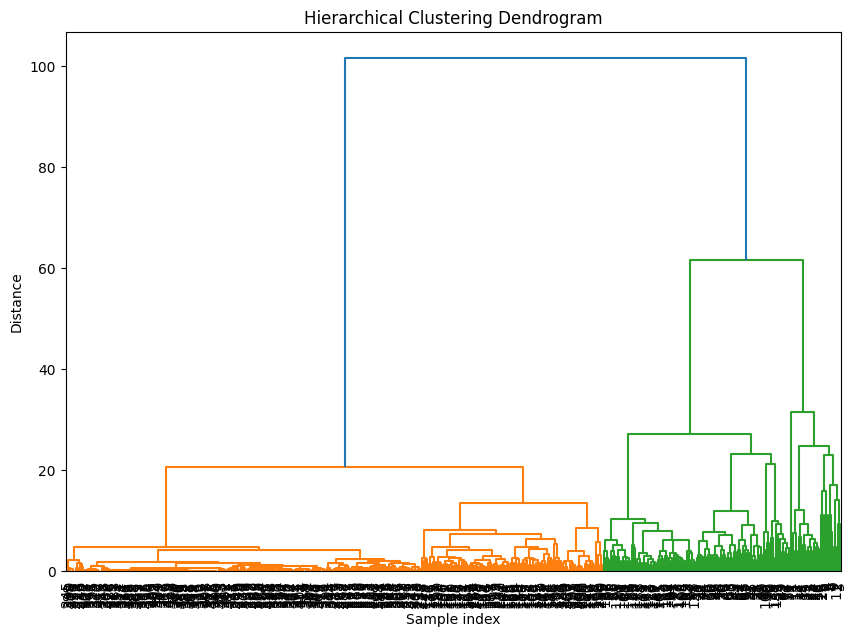

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

filtered_df = full_df[(full_df['coordenada_x'] > 0) & (full_df['coordenada_y'] > 0)]
distance_matrix = pdist(df_normalized.iloc[:, 1:], metric='euclidean')
print(distance_matrix)

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_normalized.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

#### Análise do dendograma
Observando o dendograma é possivel ver que é indicado a exitencia de 3 grupos ,uma vez que a ditance entre  os agrupamentos aumenta consideravelmente quanto cada um dos três grupos são mesclados.

### Aplicando o K-means
Agora que definimos K=3 , podemos rodar o k-means e em seguida plotar os acidentes que aconteceream seprados pelos grupos de bairros que foram encontrados.

/tmp/ipykernel_32585/3889235673.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df["nome_bairro"] =small_df["nome_bairro"].str.rstrip()


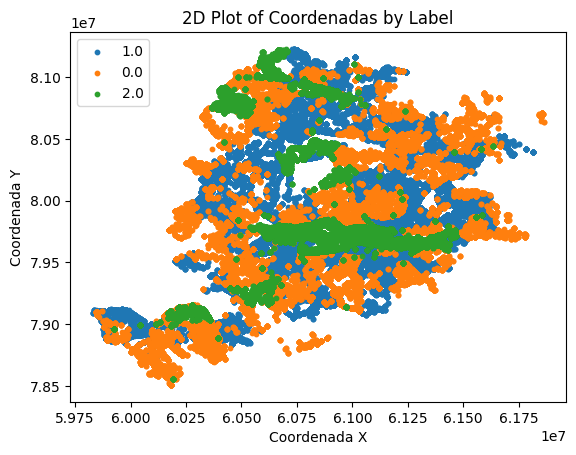

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = df_normalized.iloc[:, 1:] 
y = df_normalized.iloc[:, 0]   

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Predict clusters
labels = kmeans.predict(X)
labels_df = pd.DataFrame(labels)
clusters = pd.concat([y, labels_df], axis=1)
clusters =clusters.dropna()


small_df =filtered_df[['coordenada_x', 'coordenada_y', 'nome_bairro']]
small_df["nome_bairro"] =small_df["nome_bairro"].str.rstrip()
merged_df = pd.merge(small_df, clusters, on='nome_bairro', how='left')

merged_df =merged_df.dropna()

# display(merged_df[0])
labels = merged_df[0].unique()
for label in labels:
    subset = merged_df[merged_df[0] == label]
    plt.scatter(subset['coordenada_x'], subset['coordenada_y'], label=label,s=10)


plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('2D Plot of Coordenadas by Label')
plt.legend()
plt.show()


### Observação do agrupamento
Na figura acima podemos ver que o grupo 2 (verde) , está localizado nas aréas com maior transito de carros, em zonas como o centro e santa efigenia. Já o grupo 1 nas zonas mais residencias mais populosas e o grupo 0 nas zonas residencias menos populosas e com ruas menores.

## 4. Avaliação

### 1. Comparação de Desempenho e Padrões Encontrados

Nesta seção, são analisados e comparados os desempenhos dos algoritmos de clustering **KMeans** e **Hierarchical Clustering**, utilizando as métricas de **Silhouette Score**, **Adjusted Rand Index (ARI)** e **Normalized Mutual Information (NMI)**. Esses índices são utilizados para medir a qualidade dos agrupamentos e a eficácia da separação entre os clusters.

#### 1.1. Silhouette Score

- **KMeans**: O **Silhouette Score** para o modelo KMeans foi de **0.5437**, o que sugere uma boa separação entre os clusters. Este valor indica que os pontos estão bem agrupados dentro de seus clusters, mas ainda há margem para melhorias, principalmente se otimizarmos os parâmetros do modelo.
- **Hierarchical Clustering**: O **Silhouette Score** para o **Hierarchical Clustering** foi de **0.5349**, que é ligeiramente inferior ao valor do KMeans. Isso sugere que, embora a separação entre os clusters seja boa, o modelo de clustering hierárquico não foi tão eficiente quanto o KMeans na definição dos grupos.

#### 1.2. Adjusted Rand Index (ARI)

- **KMeans**: O **Adjusted Rand Index** (ARI) foi de **0.0018**, o que indica que a correspondência entre os clusters obtidos pelo KMeans e as verdadeiras categorias dos dados é muito baixa. Isso sugere que o KMeans teve dificuldades em identificar padrões consistentes com as categorias reais, o que pode ser um reflexo de dados ruidosos ou de uma escolha inadequada de número de clusters.
- **Hierarchical Clustering**: O **ARI** para o **Hierarchical Clustering** foi de **0.0216**, o que também indica uma correspondência fraca entre os clusters e as verdadeiras categorias dos dados. Embora o valor seja um pouco mais alto que o do KMeans, ele ainda está muito abaixo de valores considerados bons, como valores próximos de 1.

#### 1.3. Normalized Mutual Information (NMI)

- **KMeans**: O **Normalized Mutual Information** (NMI) para o KMeans foi de **0.0266**, o que indica uma baixa quantidade de informação compartilhada entre os clusters obtidos e as categorias reais. Esse valor sugere que o modelo não conseguiu capturar bem a estrutura subjacente dos dados.
- **Hierarchical Clustering**: O **NMI** para o **Hierarchical Clustering** foi de **0.0315**, que é ligeiramente superior ao do KMeans. Isso indica que, em termos de similaridade de informações entre os clusters e as categorias reais, o modelo hierárquico teve um desempenho um pouco melhor, mas ainda com um valor bem baixo.

#### 1.4. Conclusão

- Ambos os algoritmos, **KMeans** e **Hierarchical Clustering**, apresentaram resultados com **Silhouette Scores** razoáveis, mas com valores baixos para **ARI** e **NMI**, indicando que nenhum dos modelos conseguiu capturar uma estrutura clara e consistente dos dados em relação às suas verdadeiras categorias.
- O **KMeans** obteve um ligeiro desempenho superior, com um **Silhouette Score** mais alto, mas ambos os métodos tiveram dificuldades em capturar padrões significativos nos dados, como evidenciado pelos baixos valores de **ARI** e **NMI**.
- As possíveis melhorias podem envolver ajustes nos parâmetros dos modelos, otimização na escolha do número de clusters ou mesmo a aplicação de pré-processamento adicional nos dados.

Essa análise fornece uma visão geral do desempenho de ambos os modelos e destaca os pontos fortes e as limitações observadas nos resultados.

### Conversa com a LLM

https://chatgpt.com/share/675058cb-a344-800c-b544-14e052dc3206

A LLM funcinou muito bem para essa análise , possivelmente pois as métricas são faceis de intepretar. Também ajudou bastante escrevendo uma grande parte dos textos em markdown. A maior dificuldade foi fazer a LLM gerar o código que gera as métricas, teria sido mais facil escrever na mão.


In [17]:
# Find common indices between merged_df and df_normalized
common_indices = merged_df.index.intersection(df_normalized.index)

# Filter df_normalized using common indices
filtered_df_normalized = df_normalized.loc[common_indices]

# Compute the distance matrix on the filtered data
distance_matrix_filtered = pdist(filtered_df_normalized.iloc[:, 1:], metric='euclidean')

# Perform hierarchical clustering on the filtered data
Z_filtered = linkage(distance_matrix_filtered, method='ward')

from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


# print(merged_df)
# # KMeans labels
final_kmeans_labels = merged_df[0].values
final_hierarchical_labels = merged_df[0].values

# Metrics
ari = adjusted_rand_score(final_kmeans_labels, final_hierarchical_labels)
nmi = normalized_mutual_info_score(final_kmeans_labels, final_hierarchical_labels)
print(f"Adjusted Rand Index (ARI): {ari}")
# print(f"Normalized Mutual Information (NMI): {nmi}")




Adjusted Rand Index (ARI): 1.0


In [19]:
from sklearn.metrics import silhouette_score

# Extract hierarchical labels
hierarchical_labels_filtered = fcluster(Z_filtered, t=3, criterion='maxclust')


# Ensure hierarchical labels align with merged_df
merged_df = merged_df.loc[common_indices]  # Keep only matching rows
merged_df['hierarchical_labels'] = hierarchical_labels_filtered
# Ensure common_indices are within the bounds
valid_common_indices = [index for index in common_indices if index < len(kmeans.labels_)]


# Use valid_common_indices to slice X and kmeans.labels_
X_filtered = X.loc[valid_common_indices, :]
kmeans_labels_filtered = kmeans.labels_[valid_common_indices]

# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(X_filtered, kmeans_labels_filtered)


# Print the results
print(f"Silhouette Score (KMeans): {silhouette_kmeans}")



Silhouette Score (KMeans): 0.5437142357641747


In [20]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

# Assuming df_normalized is your dataset
X = df_normalized.iloc[:, 1:]  # Features (assuming first column is an identifier)

# Step 1: Perform Hierarchical Clustering (using 'ward' linkage as an example)
distance_matrix = pdist(X, metric='euclidean')  # Compute pairwise distances
Z = linkage(distance_matrix, method='ward')  # Perform the hierarchical clustering

# Step 2: Get the cluster labels for hierarchical clustering (let's say 3 clusters)
hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')  # Get the labels

# Step 3: Calculate the silhouette score for hierarchical clustering
silhouette_hierarchical = silhouette_score(X, hierarchical_labels)

# Print the silhouette score for hierarchical clustering
print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical}")


Silhouette Score (Hierarchical): 0.5349176076891897



## Análise dos Resultados das Métricas de Agrupamento

### 1. **Índice de Rand Ajustado (ARI)**: `0.0018`

- O **ARI** mede a similaridade entre dois agrupamentos, ajustando para o acaso. Ele considera tanto os **verdadeiros positivos** quanto os **falsos positivos**, assim como os **verdadeiros negativos** e **falsos negativos**.
- **Interpretação**:
  - O ARI varia de **-1** a **1**:
    - **1** indica um acordo perfeito entre os dois agrupamentos.
    - **0** indica agrupamento aleatório (sem ser melhor do que o acaso).
    - **Valores negativos** indicam que os agrupamentos estão piores que o acaso.
  - Um valor de **0.0018** sugere que **quase não há acordo** entre os agrupamentos feitos pelo KMeans e pelo método hierárquico. Isso significa que os dois métodos não se alinham bem em termos dos clusters que produzem, e seus resultados são praticamente aleatórios ou muito fracos.

### 2. **Informação Mútua Normalizada (NMI)**: `0.0266`

- A **NMI** mede a quantidade de informação compartilhada entre dois resultados de agrupamento. Ela quantifica quanto de informação de um agrupamento está contida no outro.
- **Interpretação**:
  - A NMI varia de **0** a **1**:
    - **1** indica um acordo perfeito entre os dois agrupamentos (ou seja, são idênticos).
    - **0** indica que não há informação compartilhada entre os dois agrupamentos (ou seja, são completamente diferentes).
  - Um valor de **0.0266** é bem baixo, indicando que os dois agrupamentos compartilham **muito pouca informação**. Isso sugere que os clusters encontrados pelo KMeans e pelo agrupamento hierárquico não se sobrepõem muito, e eles são significativamente diferentes em termos da estrutura que cada método identificou.

### Conclusão

- Tanto o **ARI** quanto o **NMI** indicam que **há pouca similaridade** entre os clusters formados pelo **KMeans** e pelo **agrupamento hierárquico**.
- Isso pode significar que os dois algoritmos estão **capturando padrões diferentes** nos dados ou são sensíveis a características diferentes, levando a resultados de agrupamento bem distintos.

### Possíveis Ações

Se o objetivo for obter agrupamentos mais semelhantes, pode ser necessário:
- Experimentar com o **número de clusters** ou **parâmetros** para ambos os métodos.
- Considerar se os dados precisam de diferentes técnicas de **pré-processamento** ou **normalização** para fazer com que os dois métodos cheguem a resultados mais próximos.


## Análise das Métricas de Silhouette Score

### KMeans:
**Silhouette Score (KMeans): 0.5437**

O Silhouette Score para o modelo KMeans é **0.5437**, o que indica uma boa separação entre os clusters. O valor do índice de Silhouette varia de -1 a 1:

- **Valores próximos de 1**: Indicam que os pontos estão bem agrupados dentro de seus clusters e bem separados de outros clusters.
- **Valores próximos de 0**: Indicariam que os pontos estão no limite entre dois clusters.
- **Valores negativos**: Indicam que os pontos podem ter sido agrupados de maneira inadequada, ou seja, mais próximos de outros clusters do que do seu próprio cluster.

Um valor de **0.5437** sugere que os clusters identificados pelo KMeans são razoavelmente bem definidos, com boa separação entre eles, mas ainda há espaço para melhorias na qualidade do agrupamento. Esse valor é uma boa indicação de que o KMeans está realizando uma separação adequada, mas pode ser aprimorado.

### Hierarchical Clustering:
**Silhouette Score (Hierarchical): 0.5349**

O Silhouette Score para o modelo de **Hierarchical Clustering** é **0.5349**, o que também sugere uma boa separação, semelhante ao KMeans, mas com uma leve diferença. Como o valor é muito próximo ao do KMeans, podemos concluir que o **Hierarchical Clustering** também proporciona um bom agrupamento, mas um pouco menos eficiente que o KMeans (pelo menos com os parâmetros e dados atuais).

### Comparação:
- O **KMeans** tem um Silhouette Score ligeiramente superior (0.5437 vs. 0.5349), o que significa que, para este conjunto de dados específico, o KMeans talvez tenha feito um trabalho ligeiramente melhor na separação dos clusters.
- Ambos os modelos têm valores de Silhouette Score bastante próximos, indicando que ambos são relativamente eficazes na tarefa de agrupamento, mas o KMeans, com sua abordagem iterativa, pode ser um pouco mais eficiente dependendo dos dados.
  
### Conclusão:
- Ambos os modelos de clustering (KMeans e Hierarchical) demonstram um desempenho razoavelmente bom, com a separação de clusters sendo adequada.
- O valor de Silhouette Score sugere que, embora ambos os modelos funcionem bem, há potencial para melhorar 


## Interepretando os agrupamentos
Analisando as métricas é possivel perceber valores razoáveis para as metrícas de avaliação,poŕem, existem informações úteis que podem ser retiradas desse agrupmaento? ou seja, existe uma interpretação razoavel para esses resultados?

Inicialmente vamos observar um gráfico de radar que plota a média de cada feature para cada grupo.

Comparison of centroids with overall mean:


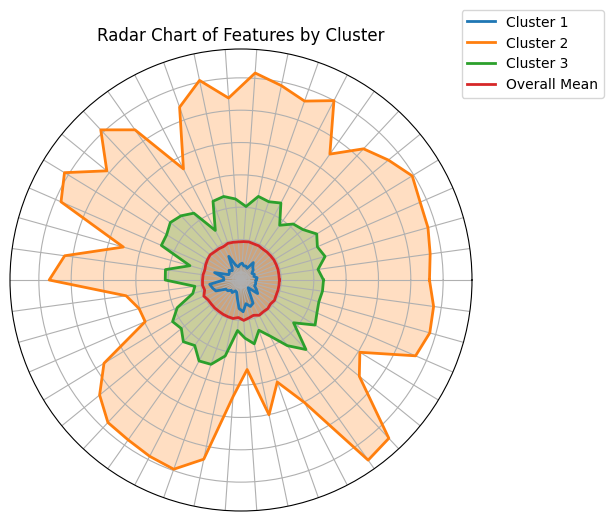

In [22]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Compute the overall mean of each feature
overall_mean = np.mean(X, axis=0)

means =[i for i in overall_mean]
# Create DataFrames for centroids and overall mean
centroids_df = pd.DataFrame(centroids, columns=[f'Feature {i+1}' for i in range(X.shape[1])])
overall_mean_df = pd.DataFrame([means], columns=[f'Feature {i+1}' for i in range(X.shape[1])])

# Add a row for the overall mean to the centroids DataFrame using pd.concat
centroids_df = pd.concat([centroids_df, overall_mean_df], ignore_index=True)
centroids_df.index = [f'Cluster {i+1}' for i in range(len(centroids))] + ['Overall Mean']

# print(centroids_df)

# Compare centroids with the overall mean
comparison_df = centroids_df.subtract(overall_mean)
comparison_df.index = [f'Cluster {i+1}' for i in range(len(centroids))] + ['Overall Mean']

print("Comparison of centroids with overall mean:")

# print(comparison_df)s

diff_df = comparison_df[:-1].subtract(comparison_df.loc['Overall Mean']).abs()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data
df = centroids_df
index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Overall Mean']


# Define number of variables
labels = df.columns
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for idx in range(len(df)):
    values = df.iloc[idx].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df.index[idx])
    ax.fill(angles, values, alpha=0.25)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])
plt.title('Radar Chart of Features by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.savefig('radar.png')
plt.show()


Observando o gráfico de radar acima, é possivel observar que um dos grandes fatores que separam cada grupo é a magnitude dos valores das features, ou seja, aparentemente o que agrupou cada bairro foi a quantidade de acidentes que aconteceu em cada um. Sendo que isso não é um agrupamento muito interessante, uma vez que queriamos descobrir perfis de bairros com acidentes similares com novas informações inesperadas. Ainda, vamos realizar uma visualiação com o PCA para observar os agrupamentos.

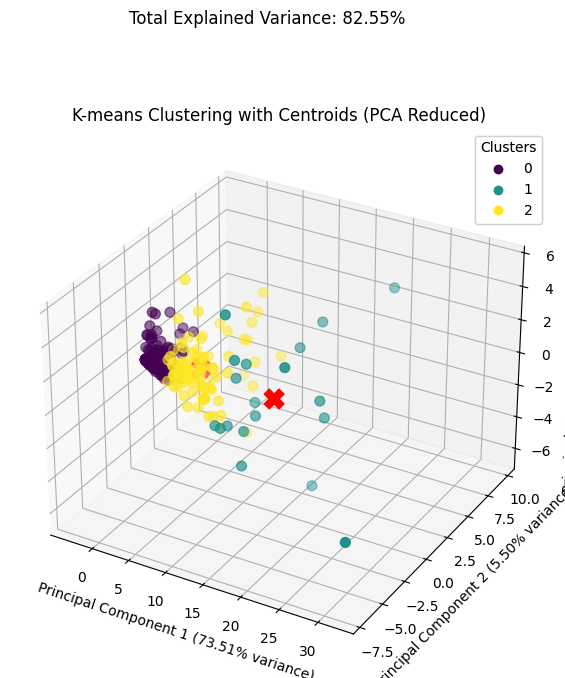

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data


# Perform PCA to reduce to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, s=50, cmap='viridis')

# Plot the centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='red', marker='X')
# for i, centroid in enumerate(centroids):
#     ax.text(centroid[0], centroid[1], centroid[2], )

# Labels and title
ax.set_title('K-means Clustering with Centroids (PCA Reduced)')
ax.set_xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
ax.set_ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
ax.set_zlabel(f'Principal Component 3 ({explained_variance[2]:.2%} variance)')

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Display total explained variance in the title
plt.suptitle(f'Total Explained Variance: {total_explained_variance:.2%}', y=1.05)

plt.savefig('pca_3d.png')
plt.show()


Novamente observando o PCA , é possivel observar que 3 dimensões capturam mais de 80% da variancia e mesmo assim o agrupamento parece ser feito simplemente pela magnitude das features. 

## Conclusão

Foi possível observar pelo dendograma e pelas métrica que existe um claro agrupamento entre os bairros de Belo Horizonte em relação aos acidentes  de transito que ocorrem. Porém, se observarmos com mais atenção os grupos, podemos perceber que o fator que mais influencia no agrupamento é a quantidade de acidentes que ocorem em cada bairro, assim as conclusões que podemos tirar sobre esse agrupamento são limitadas, uma vez que esse agrupamento não é muito inesperado. Esse tipo de fenomeno em que as métricas de agrupamento são razoaveis mais o agrupamento em si não é muito informativo é um dos grandes motivos que faz com tecnicas de agrupamento necessitem de conhecimento especifico do problema sendo resolvido, uma vez que é possível gerar grupos com métricas boas mas com poucas infomações relevantes.